In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os
import IPython.display as ipd

plt.rc('axes', axisbelow=True)

In [72]:
dur = 10 # take first 10 seconds
fn='~/Music/1.wav'  # some random music
wave, sr = librosa.load(os.path.expanduser(fn), duration=dur)

In [76]:
def window_rms(x, window_size):
  sq = np.square(x)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(sq, window, 'valid'))

# win_size = sr / 10        # 1/10th of a sec
win_size = 300 * sr / 1000  # 300 ms (default in e.g. dpmeter)
rms = window_rms(wave, int(win_size))

In [78]:
# TODO:
# * integrated loudness (lufs)
# * short term loudness (lufs)
# * short term loudness max (lufs)
# * momentary loudness (lufs)
# * momentary loudness max (lufs)
# * true peak max (dB)
# * loudness range (lu)
# * LR/MS processing

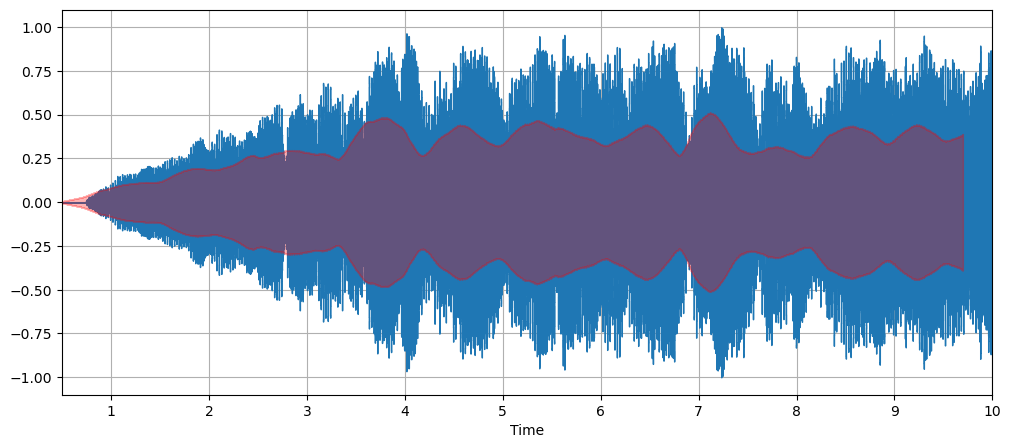

In [77]:
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(12, 5))
plt.grid()
# zooming range in seconds
ax.set(xlim=[.5, dur])
# https://librosa.org/doc/main/generated/librosa.display.waveshow.html
librosa.display.waveshow(wave, sr=sr, ax=ax, label='wave')
librosa.display.waveshow(rms,  sr=sr, ax=ax, label='rms', color='red', alpha=0.3)

In [51]:
ipd.Audio(wave, rate=sr)